# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     882.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.20e-40
Time:                        10:39:50   Log-Likelihood:               0.046164
No. Observations:                  50   AIC:                             7.908
Df Residuals:                      46   BIC:                             15.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0268      0.086     58.515      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.49907756  4.99007979  5.4409785   5.82413696  6.12189238  6.32945788
  6.45570894  6.52172521  6.55732715  6.59617666  6.67024646  6.80456713
  7.01311461  7.29651401  7.6419369   8.02520901  8.41478194  8.77691654
  9.0812261   9.30566882  9.44016925  9.48827359  9.46656712  9.40194924
  9.32721403  9.2756622   9.27562996  9.34583338  9.49229347  9.70734688
  9.97090501 10.2537545  10.52235686 10.74435884 10.89390789 10.9558997
 10.92845978 10.82325147 10.66355964 10.48046507 10.30773797 10.17628964
 10.10909379 10.11741208 10.19894382 10.33820398 10.50906734 10.67906079
 10.81469855 10.88698384]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.86127683 10.70125202 10.42679612 10.08322843  9.73020511  9.42711325
  9.21853085  9.12331258  9.12997346  9.19950084]


## Plot comparison

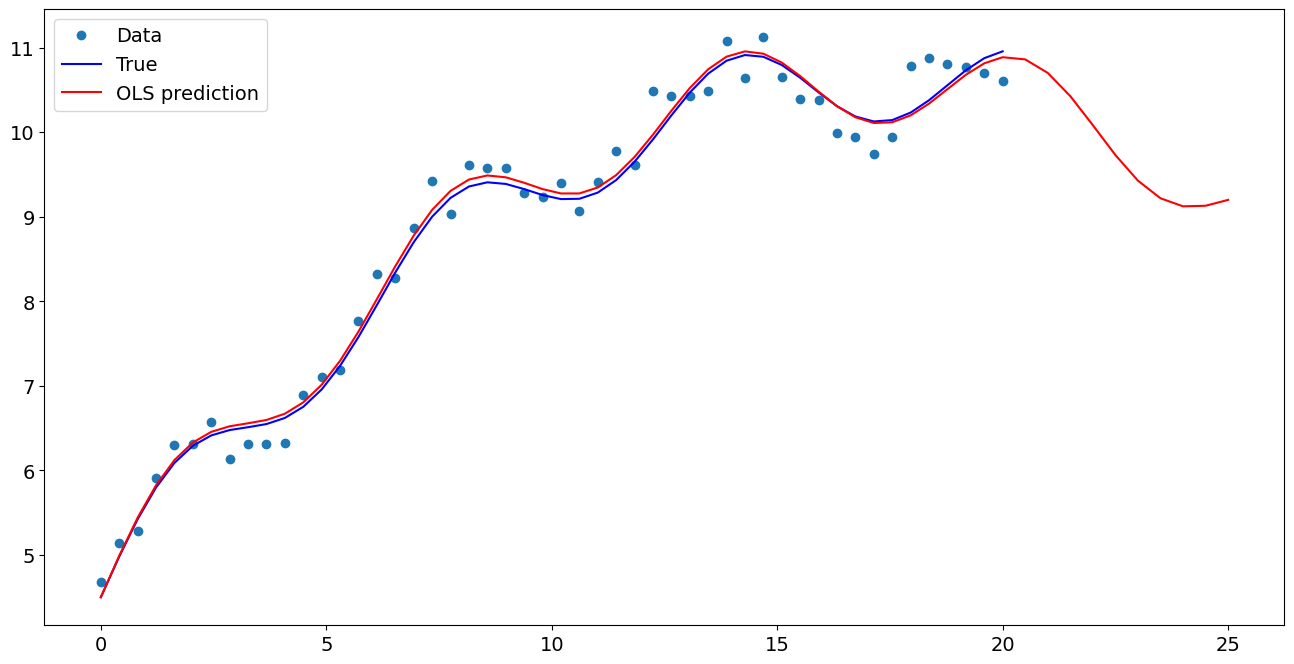

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.026807
x1                  0.507339
np.sin(x1)          0.507104
I((x1 - 5) ** 2)   -0.021109
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.861277
1    10.701252
2    10.426796
3    10.083228
4     9.730205
5     9.427113
6     9.218531
7     9.123313
8     9.129973
9     9.199501
dtype: float64